In [201]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from fwrtmodel import FWRTmodel

nx = 10
ini = np.zeros((6,nx))
ini[0] = 1. # DIN
ini[1] = 0.1  # DIP
ini[2] = 0.01  # phy
ini[3] = 0.001  # zoo
ini[4] = 1. # PON
ini[5] = 0.1  # POP

num_t = 5000
dtdays = 0.01
time = np.arange(num_t+1) * dtdays
irr = -np.cos(np.arange(num_t+1) * (2.*np.pi * dtdays/1.0)) * 500.
irr = np.where(irr>0, irr, 0)

temp = np.zeros((num_t+1, nx))
temp[:] = np.linspace(30, 20, nx)

dx = 0.2
dH = np.ones(nx) * dx
H = np.arange(dx*0.5, dH.sum(), dx)
print H

m = FWRTmodel(delta_t=dtdays)

print m

x_nl, diag = m.run_nl(ini, num_t, irr, temp, dH, H, diag=True)

fig, ax = plt.subplots(7,2,figsize=(14,14))
ax = ax.flatten()
names = 'irr temp DIN DIP phy zoo PON POP'.split()
for i in range(8):
    pc = ax[i].pcolor(x_nl[::20,i].T, vmin=0)
    plt.colorbar(pc, ax=ax[i])
    ax[i].set_title(names[i])
    
TN = x_nl[:,2] + x_nl[:,4]*10. + x_nl[:,5]*10. + x_nl[:,6]
pc = ax[8].pcolor(TN.T, vmin=2)
plt.colorbar(pc, ax=ax[8])
ax[8].set_title('TN')
    
TP = x_nl[:,3] + x_nl[:,4] + x_nl[:,5] + x_nl[:,7]
pc = ax[9].pcolor(TP.T, vmin=0.2)
plt.colorbar(pc, ax=ax[9])
ax[9].set_title('TP')

diag_names = 'phy_tempfunc lightresponse nutrientuptake'.split()
for i in range(3):
    pc = ax[10+i].pcolor(diag[::20,i].T, vmin=0)
    plt.colorbar(pc, ax=ax[10+i])
    ax[10+i].set_title(diag_names[i])
    
#plt.tight_layout()

for a in ax:
    a.set_ylim(10,0)

  0%|          | 0/5000 [00:00<?, ?it/s]

[ 0.1  0.3  0.5  0.7  0.9  1.1  1.3  1.5  1.7  1.9]
0 0 1
1 1 2
2 2 3
3 3 4
4 4 5
5 5 6
6 6 7
7 7 8
8 8 9
9 9 10


IndexError: index 10 is out of bounds for axis 0 with size 10

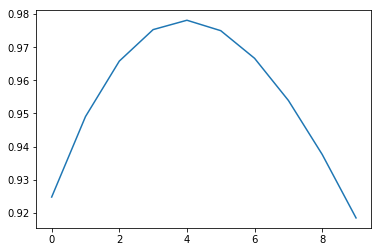

In [124]:
def lightresponse(irr, phy, H, p):
    k = 10.*phy + 0.6
    irr_norm = irr/p['irr_opt']
    return (np.exp(1.0-irr_norm*np.exp(-k*H))
            -np.exp(1.0-irr_norm))/(k*H)

p = dict(irr_opt=200.)
irr0 = 300.
phy = ini[2]

irr = lightresponse(irr0, phy, H, p)

plt.plot(irr)

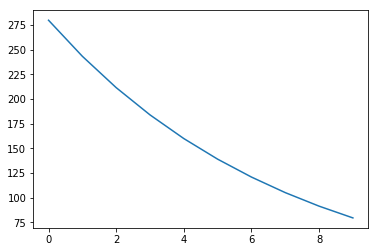

In [125]:
def lightattenuation(irr0, phy, H):
    if irr0 > 0.0:
        k = 10.*phy + 0.6
        irr = [irr0]
        dH = np.append(H[0], H[1:]-H[:-1])
        for ki, dHi in zip(k, dH):
            irr.append(irr[-1]*np.exp(-ki*dHi))
        return irr[1:]
    else:
        return np.zeros_like(phy)
    
irr = lightattenuation(irr0, phy, H)

plt.plot(irr)